<Figure size 640x480 with 0 Axes>

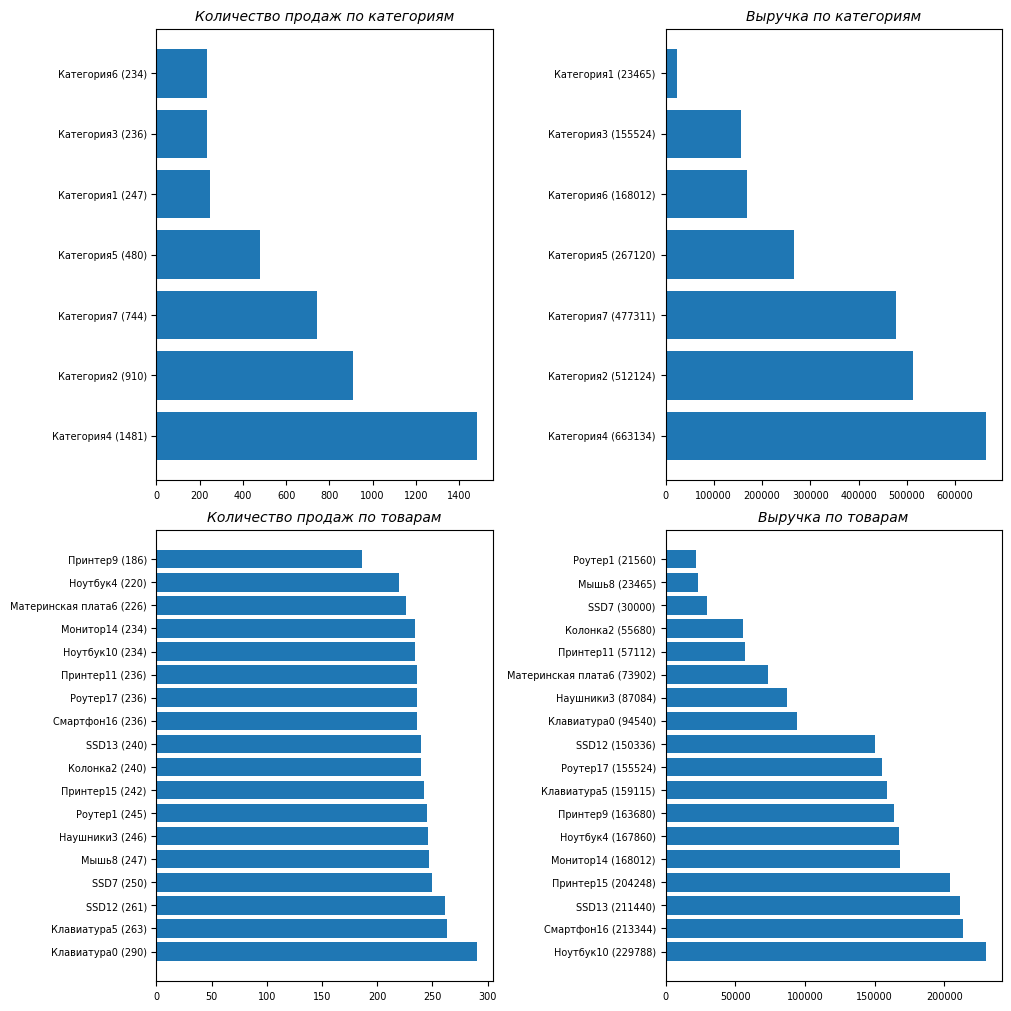

самый покупаемый продукт -  (290, 'Клавиатура0')
самый прибыльный продукт - (229788, 'Ноутбук10')
кол-во всех проданных товаров -  4332
вся выручка -  2266690
самая покупаемая категория -  (1481, 'Категория4')
самая прибыльная категория -  (663134, 'Категория4')
Введите номер заказа: 2
Информация о заказе:
               Дата Название товара Категория товара Кол-во продаж Цена за единицу Общая стоимость
2024-01-03T00:00:00           SSD12       Категория7             5             576            2880
                          Наушники3       Категория2             1             354             354
                          Монитор14       Категория6             8             718            5744
                            Роутер1       Категория4             4              88             352
                          Ноутбук10       Категория4             1             982             982
                           Ноутбук4       Категория7             1             763             763

In [2]:
from csv import reader
from matplotlib import pyplot
import pandas as pd

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(size)]
    
    def hash_func(self, key):
        key_sum = sum(ord(char) for char in key)
        return key_sum % self.size
    
    def insert(self, key, value):
        index = self.hash_func(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)
                return
        self.table[index].append((key, value))
    
    def search(self, key):
        index = self.hash_func(key)
        for k, v in self.table[index]:
            if k == key:
                return v
        return 0
    
    def increment(self, key, value):
        index = self.hash_func(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, v + value)
                return
        self.table[index].append((key, value))
    
    def items(self):
        for bucket in self.table:
            for k, v in bucket:
                yield (k, v)

def shell_sort(array):
    gap = len(array) // 2
    while gap > 0:
        for i in range(gap, len(array)):
            temp = array[i]
            j = i
            while j >= gap and array[j - gap] > temp:
                array[j] = array[j - gap]
                j -= gap
            array[j] = temp
        gap //= 2
    return array

def binary_search(array, x):
    low = 0
    high = len(array) - 1
    while low <= high:
        mid = (low + high) // 2
        if array[mid][0] == x:
            return mid
        elif array[mid][0] < x:
            low = mid + 1
        else:
            high = mid - 1
    return None

def main():
    products_num = HashTable(100)
    products_total = HashTable(100)
    categories_num = HashTable(100)
    categories_total = HashTable(100)
    rows_array = []

    total_sum = 0
    num_sum = 0

    try:
        with open("data.csv") as csv_file:
            csv_reader = reader(csv_file, delimiter=",")

            for row in csv_reader:
                try:
                    num = int(row[4])
                    total = int(row[6])

                    name = row[2]
                    products_num.increment(name, num)
                    products_total.increment(name, total)

                    category = row[3]
                    categories_num.increment(category, num)
                    categories_total.increment(category, total)

                    total_sum += total
                    num_sum += num

                    id = int(row[0])
                    result = None
                    for row2 in rows_array:
                        if row2[0] == id:
                            result = row2
                            break
                    
                    if result:
                        result.append(row[1:])
                    else:
                        rows_array.append([id] + [row[1:]])
                except (IndexError, ValueError):
                    continue

            if not rows_array:
                print("Нет информации")
                return
    except FileNotFoundError:
        print("Файл не найден")
        return
    except UnicodeDecodeError:
        print("Неправильный тип файла")
        return

    products_num_list = [(value, key) for key, value in products_num.items()]
    products_total_list = [(value, key) for key, value in products_total.items()]
    categories_num_list = [(value, key) for key, value in categories_num.items()]
    categories_total_list = [(value, key) for key, value in categories_total.items()]

    products_num_list = shell_sort(products_num_list)
    products_total_list = shell_sort(products_total_list)
    categories_num_list = shell_sort(categories_num_list)
    categories_total_list = shell_sort(categories_total_list)

    rows_array = shell_sort(rows_array)


    pyplot.tight_layout()
    pyplot.rcParams['figure.figsize'] = [10, 10]
    figure, ((axes1, axes2), (axes3, axes4)) = pyplot.subplots(2, 2, layout="constrained", clear=True)
    figure.canvas.manager.set_window_title("Товары")


    for array, axes, label in [(categories_num_list, axes1, "Количество продаж по категориям"),
                           (categories_total_list, axes2, "Выручка по категориям"),
                           (products_num_list, axes3, "Количество продаж по товарам"),
                           (products_total_list, axes4, "Выручка по товарам")]:
        sizes = []
        labels = []
        for value, key in array:
            sizes.append(value)
            labels.append(key + " (" + str(value) + ")")
        axes.barh(labels, sizes)
        axes.set_title(label, fontstyle="oblique", fontsize="medium")
        axes.invert_yaxis()  
        axes.tick_params(axis='y', labelsize=7)
        axes.tick_params(axis='x', labelsize=7)

    pyplot.show(block=False)


    print("самый покупаемый продукт - ", products_num_list[-1])
    print("самый прибыльный продукт -", products_total_list[-1])
    print("кол-во всех проданных товаров - ", num_sum)
    print("вся выручка - ", total_sum)
    print("самая покупаемая категория - ", categories_num_list[-1])
    print("самая прибыльная категория - ", categories_total_list[-1])
    
    num = input("Введите номер заказа: ")
    try:
        num = int(num)
    except ValueError:
        print("Неверный формат номера заказа")
        exit()

    result = binary_search(rows_array, num)
    if result:
        print("Информация о заказе:")
    
        order_info = []
        for i in range(1, len(rows_array[result])):
            info = rows_array[result][i]
            if i == 1:
                order_info.append({
                'Дата': info[0],
                'Название товара': info[1],
                'Категория товара': info[2],
            
                'Кол-во продаж': info[3],
                'Цена за единицу': info[4],
                'Общая стоимость': info[5]
            })
            else:
                order_info.append({
                'Дата': ' ',
                'Название товара': info[1],
                'Категория товара': info[2],
            
                'Кол-во продаж': info[3],
                'Цена за единицу': info[4],
                'Общая стоимость': info[5]
            })
        order_df = pd.DataFrame(order_info)
        print(order_df.to_string(index=False)) 
    else:
        print("Заказ не найден")

if __name__ == "__main__":
    main()

